## localized investigation of the inland empire

In [15]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
gdf = gpd.read_file('clean_data/master.shp')

In [26]:
counties = gpd.read_file("raw_data/cnty19_1.shp")

In [4]:
gdf.columns

Index(['index', 'OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'CountyName',
       'DistrictNa', 'DistrictTy', 'GradeLow',
       ...
       'm_prio FOS', 'm_prio HI', 'm_prio HOM', 'm_prio MR', 'm_prio PI',
       'm_prio RFP', 'm_prio SED', 'm_prio SWD', 'm_prio WH', 'geometry'],
      dtype='object', length=181)

In [27]:
counties.columns

Index(['OBJECTID', 'COUNTY_NAM', 'COUNTY_ABB', 'COUNTY_NUM', 'COUNTY_COD',
       'COUNTY_FIP', 'ISLAND', 'GlobalID', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [28]:
study_area = ['Riverside', 'San Bernardino']
# set counties here
ie = gdf.loc[gdf['CountyName'].isin(study_area)]
iec = counties.loc[counties['COUNTY_NAM'].isin(study_area)]

In [18]:
ie.head()

,index,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,district_1,unduplicat,base_grant,supplement,concentrat,total_gran,cds,District C,e_chan AA,e_chan AI,e_chan ALL,e_chan AS,e_chan EL,e_chan ELO,e_chan EO,e_chan FI,e_chan FOS,e_chan HI,e_chan HOM,e_chan MR,e_chan PI,e_chan RFP,e_chan SED,e_chan SWD,e_chan WH,e_curr AA,e_curr AI,e_curr ALL,e_curr AS,e_curr EL,e_curr ELO,e_curr EO,e_curr FI,e_curr FOS,e_curr HI,e_curr HOM,e_curr MR,e_curr PI,e_curr RFP,e_curr SED,e_curr SWD,e_curr WH,e_prio AA,e_prio AI,e_prio ALL,e_prio AS,e_prio EL,e_prio ELO,e_prio EO,e_prio FI,e_prio FOS,e_prio HI,e_prio HOM,e_prio MR,e_prio PI,e_prio RFP,e_prio SED,e_prio SWD,e_prio WH,m_chan AA,m_chan AI,m_chan ALL,m_chan AS,m_chan EL,m_chan ELO,m_chan EO,m_chan FI,m_chan FOS,m_chan HI,m_chan HOM,m_chan MR,m_chan PI,m_chan RFP,m_chan SED,m_chan SWD,m_chan WH,m_curr AA,m_curr AI,m_curr ALL,m_curr AS,m_curr EL,m_curr ELO,m_curr EO,m_curr FI,m_curr FOS,m_curr HI,m_curr HOM,m_curr MR,m_curr PI,m_curr RFP,m_curr SED,m_curr SWD,m_curr WH,m_prio AA,m_prio AI,m_prio ALL,m_prio AS,m_prio EL,m_prio ELO,m_prio EO,m_prio FI,m_prio FOS,m_prio HI,m_prio HOM,m_prio MR,m_prio PI,m_prio RFP,m_prio SED,m_prio SWD,m_prio WH,geometry
472,391.0,473,2018-19,0602430,3366977,33669770000000,Riverside,Alvord Unified,Unified,KG,12,KG,12,General Assistance,"41,42","28,31","60,67","11 - City, Large",2018-19 District Boundary Adjustment/Correction,18504,0,18504,697,3.8,49,0.3,680,3.7,274,1.5,14698,79.400002,238,1.3,78,0.4,1772,9.600000,18,0.1,6425,34.700001,92,0.5,572,3.1,0,0.0,2135,11.5,14679,79.300003,14926,0.810,9689.0,42.200001,9744.0,27.799999,1509.0,31.799999,19346.0,13.0,1525.0,91.699997,37.000000,4.7,19989.0,2.6,65186.551516,1.195834e+08,Alvord Unified,0.8107,"151,746,883","24,604,240","19,780,205","198,102,495",33669770000000,66977,-2.9,18.4,1.9,-0.9,2.5,1.5,2.0,-2.0,23.4,1.8,-15.4,-24.5,-2.2,2.2,1.8,3.0,7.5,-32.3,-41.7,-27.3,43.0,-47.5,-81.3,-14.2,36.6,-49.7,-36.0,-68.7,4.0,-37.8,28.3,-37.7,-119.9,7.0,-29.4,-60.1,-29.3,43.9,-50.0,-82.8,-16.2,38.6,-73.1,-37.7,-53.3,28.5,-35.6,26.1,-39.5,-122.8,-0.5,-7.7,8.4,-2.1,-4.1,-1.7,-1.8,-2.2,-14.0,2.6,-1.8,-29.9,-17.6,-18.7,-3.3,-2.2,0.7,-0.1,-71.4,-66.7,-61.8,22.7,-79.1,-106.6,-47.4,4.0,-90.6,-71.3,-108.8,-26.2,-63.9,-17.5,-72.4,-150.4,-24.9,-63.7,-75.2,-59.7,26.8,-77.5,-104.8,-45.2,18.0,-93.2,-69.6,-79.0,-8.7,-45.2,-14.1,-70.2,-151.1,-24.8,"POLYGON ((-13074875.389 4024405.751, -13074875..."
473,392.0,474,2018-19,0603840,3366985,33669850000000,Riverside,Banning Unified,Unified,KG,12,KG,12,Differentiated Assistance,36,"23,28","42,71","21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,4617,0,4617,368,8.0,128,2.8,200,4.3,40,0.9,3197,69.199997,107,2.3,6,0.1,561,12.200000,10,0.2,894,19.400000,30,0.6,220,4.8,0,0.0,609,13.2,4052,87.800003,4032,0.879,2264.0,25.000000,2269.0,15.000000,344.0,21.500000,4884.0,22.1,358.0,67.300003,41.900002,11.7,5076.0,6.0,163656.693700,1.152159e+09,Banning Unified,0.8720,"35,523,892","6,195,367","5,719,346","48,136,743",33669850000000,66985,-6.9,9.6,-7.3,-2.1,-12.1,-3.9,-6.3,NaN,4.8,-8.2,2.7,-6.2,NaN,-3.0,-8.0,-8.6,-10.1,-76.4,-85.2,-62.6,-32.0,-81.9,-109.4,-63.4,-33.7,-101.2,-63.5,-74.3,-46.2,NaN,-32.2,-66.7,-140.0,-63.8,-69.5,-94.8,-55.3,-29.8,-69.8,-105.6,-57.2,NaN,-106.0,-55.3,-76.9,-40.0,NaN,-29.2,-58.7,-131.4,-53.7,-7.7,1.3,-10.1,5.9,-17.5,-4.6,-8.9,NaN,4.6,-12.7,2.3,-19.4,NaN,-22.9,-10.9,-8.6,-3.7,-117.7,-137.2,-102.7,-67.5,-109.7,-123

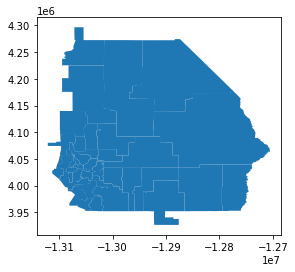

In [16]:
ie.plot()

## plotting

In [22]:
bins_list = [0.10, 0.25, 0.5499, 0.7, 1]
cm = plt.cm.cividis_r
upc = ie['UPpct']

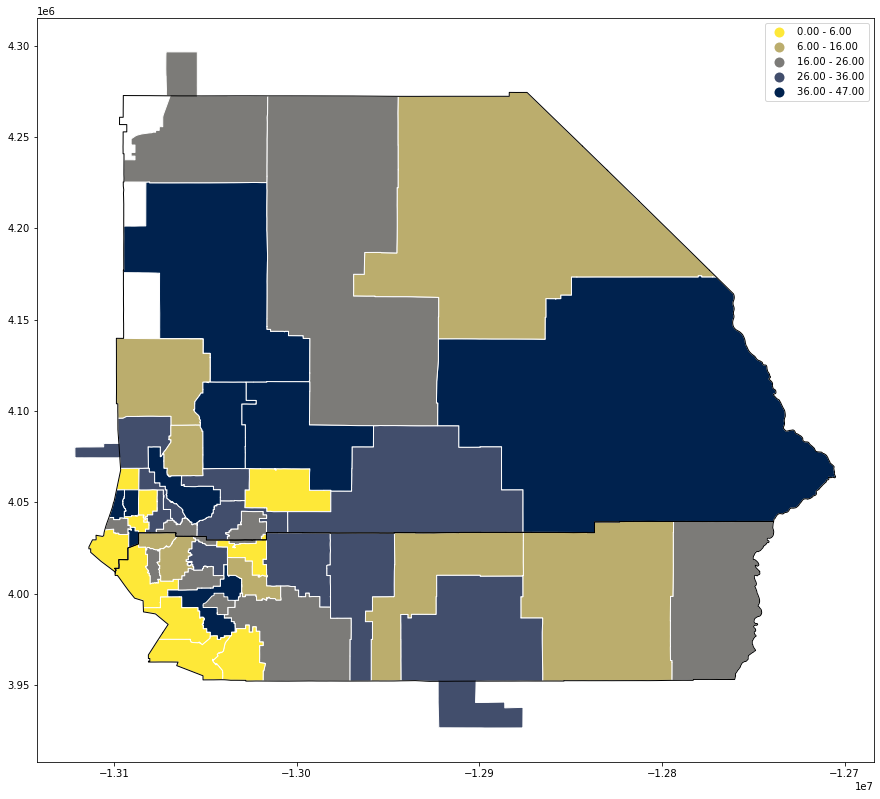

In [44]:
fig, ax = plt.subplots(figsize=(15,15))

ie.plot(
    column='concentrat',
    legend=True,
    scheme='fisher_jenks',
    linewidth=1,
    edgecolor='white',
    cmap=cm,
    ax=ax
        )

# ax.set_title("Share of Socioeconomically Disadvantaged Students by District", fontsize=16)

iec.boundary.plot(facecolor='none',
                       edgecolor='black',
                       linewidth=1,
                       ax=ax)